In [2]:
%pip install seaborn
%pip install preprocessing


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# 1 Завантажити дані, вивести назви колонок і розмір датасета

In [4]:
df = pd.read_csv("./weatherHistory.csv")

df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# 2 Опрацювати пропуски (по можливості заповнити їх або видалити)

<AxesSubplot: >

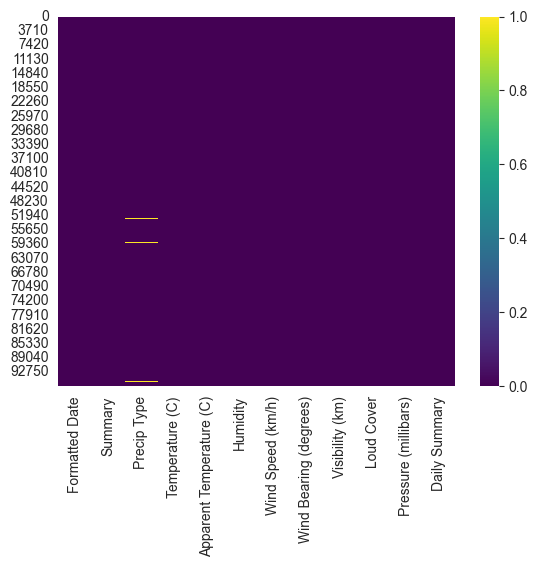

In [6]:
sns.heatmap(df.isnull(), cmap='viridis')

In [7]:
tmp = df["Summary"].value_counts() < 100

keys = tmp.keys()
vals = np.array(tmp)

print(keys)
print(vals)

toDelete = []

for i in range(len(keys)):
    if vals[i] == True:
        toDelete.append(keys[i])

toDelete

Index(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Clear', 'Foggy',
       'Breezy and Overcast', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Dry and Partly Cloudy',
       'Windy and Partly Cloudy', 'Light Rain', 'Breezy', 'Windy and Overcast',
       'Humid and Mostly Cloudy', 'Drizzle', 'Breezy and Foggy',
       'Windy and Mostly Cloudy', 'Dry', 'Humid and Partly Cloudy',
       'Dry and Mostly Cloudy', 'Rain', 'Windy', 'Humid and Overcast',
       'Windy and Foggy', 'Windy and Dry',
       'Dangerously Windy and Partly Cloudy', 'Breezy and Dry'],
      dtype='object')
[False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


['Dry and Partly Cloudy',
 'Windy and Partly Cloudy',
 'Light Rain',
 'Breezy',
 'Windy and Overcast',
 'Humid and Mostly Cloudy',
 'Drizzle',
 'Breezy and Foggy',
 'Windy and Mostly Cloudy',
 'Dry',
 'Humid and Partly Cloudy',
 'Dry and Mostly Cloudy',
 'Rain',
 'Windy',
 'Humid and Overcast',
 'Windy and Foggy',
 'Windy and Dry',
 'Dangerously Windy and Partly Cloudy',
 'Breezy and Dry']

In [8]:
df = df.drop(df[df["Summary"].str.contains(pat=" and ")].index)
df = df.drop(df[df["Summary"].isin(toDelete)].index)


np.unique(df['Summary'].values)

array(['Clear', 'Foggy', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy'],
      dtype=object)

In [9]:
# Remove useless column

df = df.drop(columns=['Precip Type', 'Loud Cover'])
df.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


# 3 Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

/var/folders/pf/0l4vr5sx3458dlwp6hhfl46r0000gn/T/ipykernel_60496/1949841132.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


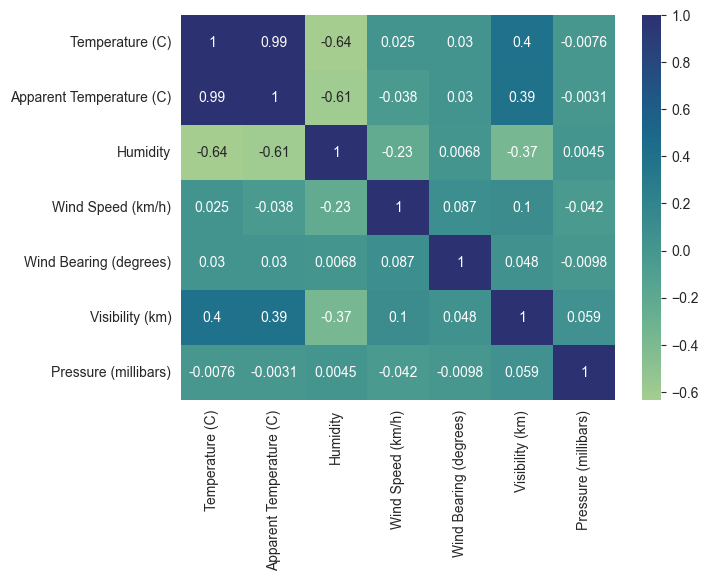

In [10]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corr, cmap='crest', annot=True)

plt.show()

## Histograms

In [11]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,94462.000000,94462.000000,94462.000000,94462.000000,94462.000000,94462.000000,94462.000000
mean,11.945583,10.902873,0.736691,10.388502,186.665781,10.340370,1003.612162
std,9.575749,10.693983,0.194835,6.192179,107.309948,4.209209,115.861367
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.561111,2.344444,0.610000,5.651100,113.000000,8.259300,1012.020000
50%,12.061111,12.061111,0.790000,9.740500,180.000000,10.046400,1016.515000
75%,18.844444,18.844444,0.900000,13.974800,290.000000,14.876400,1021.150000
max,39.905556,39.344444,1.000000,32.827900,359.000000,16.100000,1046.380000


<AxesSubplot: xlabel='Temperature (C)', ylabel='Count'>

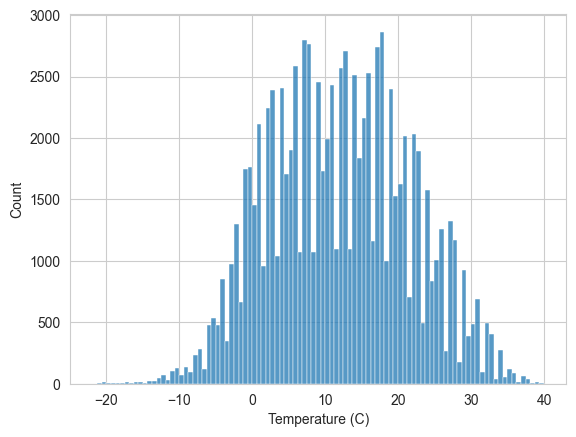

In [12]:
sns.histplot(x='Temperature (C)', data=df)

<AxesSubplot: xlabel='Wind Speed (km/h)', ylabel='Count'>

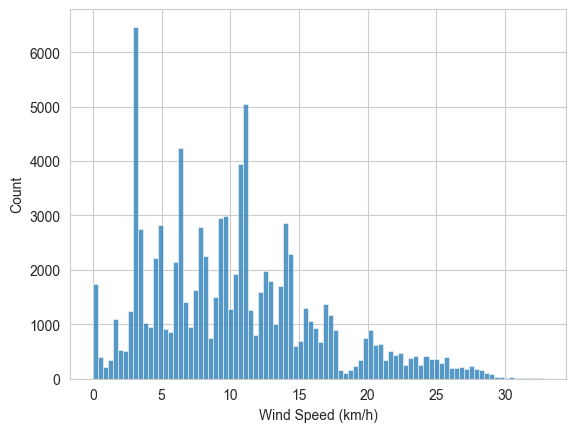

In [13]:
sns.histplot(x='Wind Speed (km/h)', data=df)

<AxesSubplot: xlabel='Visibility (km)', ylabel='Count'>

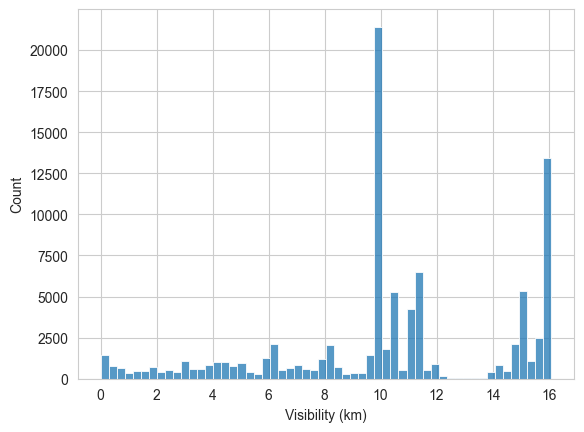

In [14]:
sns.histplot(x='Visibility (km)', data=df)

<AxesSubplot: xlabel='Visibility (km)'>

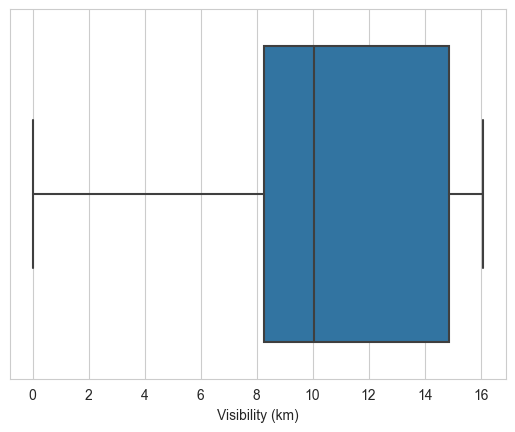

In [15]:
sns.boxplot(data=df, x="Visibility (km)")

<AxesSubplot: xlabel='Temperature (C)', ylabel='Summary'>

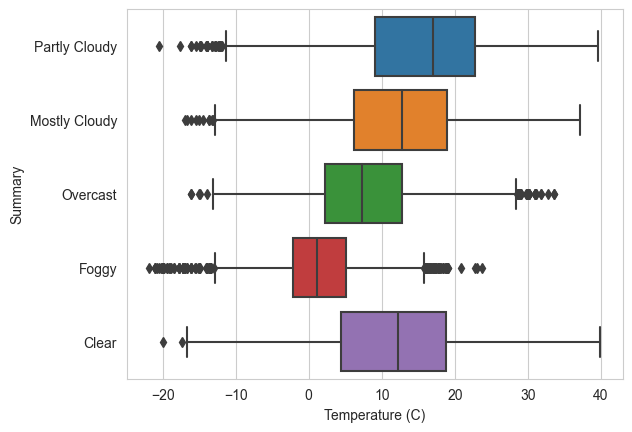

In [16]:
sns.boxplot(data=df, x="Temperature (C)", y="Summary")

<AxesSubplot: xlabel='Wind Speed (km/h)', ylabel='Summary'>

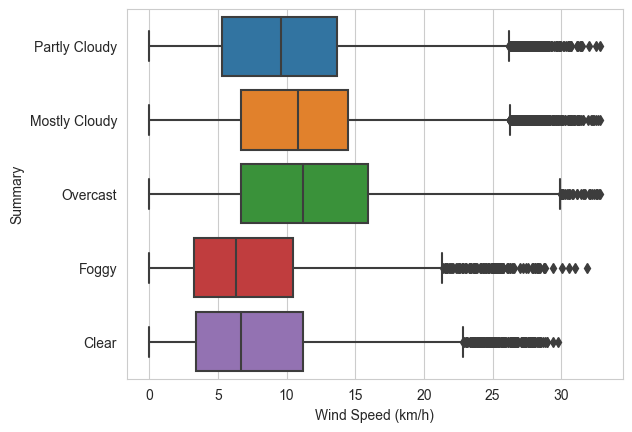

In [17]:
sns.boxplot(data=df, x="Wind Speed (km/h)", y="Summary")

# 4 Нормалізувати дані

In [18]:
df_scaled = df.copy()

to_scale = ["Temperature (C)",
            "Apparent Temperature (C)",
            "Humidity",
            "Wind Speed (km/h)",
            "Wind Bearing (degrees)",
            "Visibility (km)",
            "Pressure (millibars)"]

df_scaled[to_scale] = (df_scaled[to_scale] - df_scaled[to_scale].mean()) / df_scaled[to_scale].std()
df_scaled.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,-0.258294,-0.328595,0.786864,0.602566,0.599518,1.303316,0.099411,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,-0.270478,-0.343660,0.632888,0.625967,0.674068,1.303316,0.103726,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,-0.268157,-0.142612,0.786864,-1.043268,0.161534,1.096769,0.106402,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,-0.381870,-0.463665,0.478912,0.599966,0.767256,1.303316,0.110458,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,-0.333136,-0.367038,0.478912,0.105956,0.674068,1.303316,0.111321,Partly cloudy throughout the day.


# 5 Провести навчання наступних класифікаторів:

## kNN

In [19]:
summary_unique = np.unique(df_scaled['Summary'].values)

int_to_summary = dict(enumerate(summary_unique))
summary_to_int = {el: ind for ind, el in int_to_summary.items()}
print(summary_unique)

['Clear' 'Foggy' 'Mostly Cloudy' 'Overcast' 'Partly Cloudy']


In [20]:
df_scaled['Summary Int'] = df_scaled['Summary'].map(lambda x: summary_to_int[x])

df_scaled.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Summary Int
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,-0.258294,-0.328595,0.786864,0.602566,0.599518,1.303316,0.099411,Partly cloudy throughout the day.,4
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,-0.270478,-0.343660,0.632888,0.625967,0.674068,1.303316,0.103726,Partly cloudy throughout the day.,4
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,-0.268157,-0.142612,0.786864,-1.043268,0.161534,1.096769,0.106402,Partly cloudy throughout the day.,2
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,-0.381870,-0.463665,0.478912,0.599966,0.767256,1.303316,0.110458,Partly cloudy throughout the day.,4
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,-0.333136,-0.367038,0.478912,0.105956,0.674068,1.303316,0.111321,Partly cloudy throughout the day.,2


In [21]:
df_scaled = df_scaled.drop(['Formatted Date'], axis=1)
df_scaled = df_scaled.drop(['Summary'], axis=1)
df_scaled = df_scaled.drop(['Daily Summary'], axis=1)


dataset = df_scaled.drop(['Summary Int'], axis = 1)
answer = df_scaled['Summary Int']

dataset_train, dataset_test, answer_train, answer_test = train_test_split(dataset, answer, test_size=0.20)

In [22]:
kNN = KNeighborsClassifier(n_neighbors=29, weights='uniform', algorithm='auto')

kNN.fit(dataset_train, answer_train)

prediction = kNN.predict(dataset_test)
print(confusion_matrix(answer_test,prediction))

[[ 434   39  471  165 1044]
 [  10 1414    4   38    1]
 [ 176   18 2685  720 2081]
 [  82   69 1096 1477  485]
 [ 294   29 1794  395 3872]]


In [23]:
rep_df = pd.DataFrame(
    classification_report(answer_test,prediction, digits=2, output_dict=True)
).transpose()

rep_df

,precision,recall,f1-score,support
0,0.435743,0.201579,0.275643,2153.000000
1,0.901211,0.963872,0.931489,1467.000000
2,0.443802,0.472711,0.457801,5680.000000
3,0.528444,0.460268,0.492005,3209.000000
4,0.517440,0.606516,0.558448,6384.000000
accuracy,0.523051,0.523051,0.523051,0.523051
macro avg,0.565328,0.540989,0.543077,18893.000000
weighted avg,0.517659,0.523051,0.513642,18893.000000


## Decision Tree

In [24]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
dt = dt.fit(dataset_train, answer_train)
prediction = dt.predict(dataset_test)

print(confusion_matrix(answer_test,prediction))

[[ 770    1  469  187  726]
 [   2 1465    0    0    0]
 [ 502    0 2467  976 1735]
 [ 191    0  937 1498  583]
 [ 843    0 1777  592 3172]]


In [25]:
rep_df = pd.DataFrame(
    classification_report(answer_test,prediction, digits=2, output_dict=True)
).transpose()

rep_df

,precision,recall,f1-score,support
0,0.333622,0.357641,0.345214,2153.000000
1,0.999318,0.998637,0.998977,1467.000000
2,0.436637,0.434331,0.435481,5680.000000
3,0.460498,0.466812,0.463634,3209.000000
4,0.510296,0.496867,0.503492,6384.000000
accuracy,0.496057,0.496057,0.496057,0.496057
macro avg,0.548074,0.550857,0.549360,18893.000000
weighted avg,0.497531,0.496057,0.496712,18893.000000


In [26]:
# plt.figure(figsize = (10, 10))
# plot_tree(dt,
#           feature_names = ["Temperature", "Apparent Temperature", "Humiditu", "Wind Speed", "Wind Bearing", "Visibility", "Presure"],
#           class_names = summary_unique, filled = True)
# plt.show()

## SVM

In [27]:
svm = SVC(C=1.0, gamma = 2, kernel = 'rbf')

In [28]:
svm = svm.fit(dataset_train, answer_train)
prediction = svm.predict(dataset_test)

In [29]:
print(confusion_matrix(answer_test,prediction))

[[ 319   14  393  191 1236]
 [   3 1444    2   11    7]
 [  70   12 2654  728 2216]
 [  35   32 1074 1544  524]
 [ 135    8 1609  383 4249]]


In [30]:
rep_df = pd.DataFrame(
    classification_report(answer_test,prediction, digits=2, output_dict=True)
).transpose()

rep_df

,precision,recall,f1-score,support
0,0.567616,0.148165,0.234991,2153.000000
1,0.956291,0.984322,0.970104,1467.000000
2,0.463015,0.467254,0.465124,5680.000000
3,0.540427,0.481147,0.509067,3209.000000
4,0.516156,0.665570,0.581418,6384.000000
accuracy,0.540412,0.540412,0.540412,0.540412
macro avg,0.608701,0.549292,0.552141,18893.000000
weighted avg,0.544342,0.540412,0.524869,18893.000000


## Random Forest

In [31]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=20, criterion='gini', random_state=0)
rfc = rfc.fit(dataset_train, answer_train)
prediction = rfc.predict(dataset_test)

print(confusion_matrix(answer_test,prediction))

[[  60   14  564  240 1275]
 [   3 1464    0    0    0]
 [   0    4 2659  568 2449]
 [   0    0 1433 1299  477]
 [   2    2 1825  386 4169]]


In [32]:
rep_df = pd.DataFrame(
    classification_report(answer_test,prediction, digits=2, output_dict=True)
).transpose()

rep_df

,precision,recall,f1-score,support
0,0.923077,0.027868,0.054103,2153.000000
1,0.986523,0.997955,0.992206,1467.000000
2,0.410276,0.468134,0.437300,5680.000000
3,0.521059,0.404799,0.455630,3209.000000
4,0.498088,0.653039,0.565135,6384.000000
accuracy,0.510824,0.510824,0.510824,0.510824
macro avg,0.667805,0.510359,0.500875,18893.000000
weighted avg,0.561947,0.510824,0.483028,18893.000000


## AdaBoost

In [33]:
abc = AdaBoostClassifier(n_estimators=30, learning_rate=1.2, random_state=0)
abc = abc.fit(dataset_train, answer_train)
prediction = abc.predict(dataset_test)

print(confusion_matrix(answer_test,prediction))

[[  67    1   66 1800  219]
 [   1 1466    0    0    0]
 [  37    0  132 4718  793]
 [  35    0  188 2314  672]
 [  41    0  128 5697  518]]


In [34]:
rep_df = pd.DataFrame(
    classification_report(answer_test,prediction, digits=2, output_dict=True)
).transpose()

rep_df

,precision,recall,f1-score,support
0,0.370166,0.031119,0.057412,2153.000000
1,0.999318,0.999318,0.999318,1467.000000
2,0.256809,0.023239,0.042622,5680.000000
3,0.159268,0.721097,0.260909,3209.000000
4,0.235241,0.081140,0.120662,6384.000000
accuracy,0.238025,0.238025,0.238025,0.238025
macro avg,0.404160,0.371183,0.296185,18893.000000
weighted avg,0.303526,0.238025,0.182039,18893.000000


# Lab 2

In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

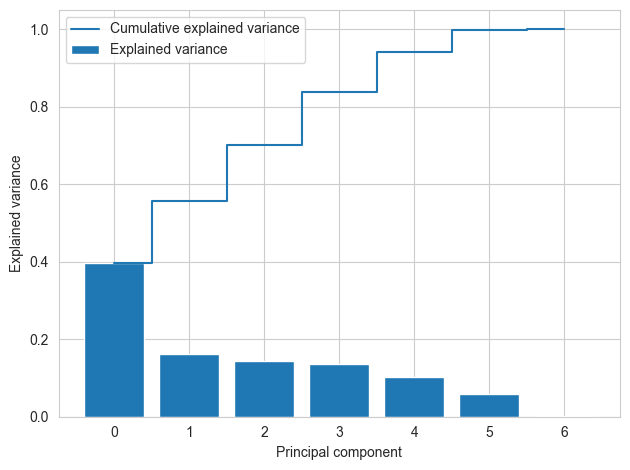

In [42]:
pca = PCA()
X_pca = pca.fit_transform(dataset)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

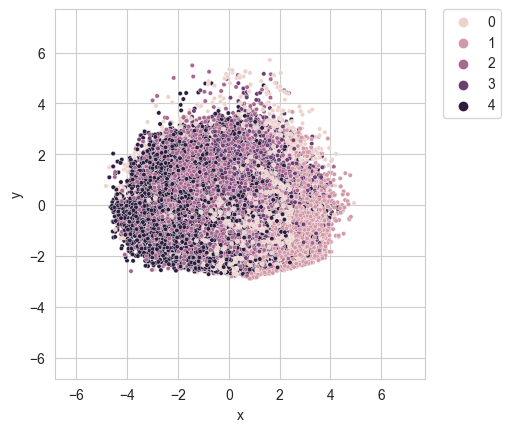

In [43]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataset)

pca_result_df = pd.DataFrame({'x': pca_result[:,0], 'y': pca_result[:,1], 'label': answer})

fig, ax = plt.subplots(1)
sns.scatterplot(x='x', y='y', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-2, pca_result.max()+2)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [ ]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(dataset)

tsne_result_df = pd.DataFrame({'x': tsne_result[:,0], 'y': tsne_result[:,1], 'label': answer})

fig, ax = plt.subplots(1)
sns.scatterplot(x='x', y='y', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-2, tsne_result.max()+2)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)